<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/adding_C3/C3/W4/ungraded_labs/C3_W4_Lab_2_irish_lyrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflow==2.5.0

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [ ]:
# irish-lyrics-eof.txt
!gdown --id 15UqmiIm0xwh9mt0IYq2z3jHaauxQSTQT

In [16]:
tokenizer = Tokenizer()

data = open('./irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print([*tokenizer.word_index][:10])
print(total_words)


['the', 'and', 'i', 'to', 'a', 'of', 'my', 'in', 'me', 'for']
2690


In [4]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [5]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [6]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [7]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [8]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [19]:
print([*tokenizer.word_index][:20])

['the', 'and', 'i', 'to', 'a', 'of', 'my', 'in', 'me', 'for', 'you', 'all', 'was', 'she', 'that', 'on', 'with', 'her', 'but', 'as']


In [10]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


C:\Users\oeb\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
377/377 [==============================] - 7s 15ms/step - loss: 6.6274 - accuracy: 0.0745
Epoch 2/100
377/377 [==============================] - 6s 15ms/step - loss: 5.7288 - accuracy: 0.1152
Epoch 3/100
377/377 [==============================] - 6s 15ms/step - loss: 4.8336 - accuracy: 0.1633
Epoch 4/100
377/377 [==============================] - 6s 15ms/step - loss: 3.8947 - accuracy: 0.2407
Epoch 5/100
377/377 [==============================] - 6s 15ms/step - loss: 3.0477 - accuracy: 0.3570
Epoch 6/100
377/377 [==============================] - 6s 15ms/step - loss: 2.4084 - accuracy: 0.4589
Epoch 7/100
377/377 [==============================] - 6s 15ms/step - loss: 1.9457 - accuracy: 0.5495
Epoch 8/100
377/377 [==============================] - 6s 16ms/step - loss: 1.6025 - accuracy: 0.6187
Epoch 9/100
377/377 [==============================] - 6s 16ms/step - loss: 1.3486 - accuracy: 0.6784
Epoch 10/100
377/377 [==============================] - 6s 16ms/step - loss: 1.181

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

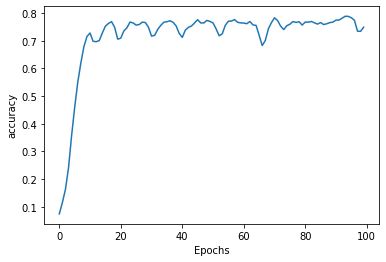

In [20]:
plot_graphs(history, 'accuracy')


In [22]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	porbs = model.predict(token_list)
	predicted = np.argmax(porbs, axis=-1)[-1]
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

I've got a bad feeling about this world there is sentence boy in the fervor of night without de diddle day and dismay in your drums and guns and drums and guns is bare over dawn boldly with gone and dismay standing that not be my croppy says love can carry two years will love him be be found gallant irishmen to greet you darling to another with another here free darling first were forth in strife in bondage and water polkas and heavy odds he bore a fond farewell my soul over says beguiled up of sport and silver bells are laid her writin when cry
